<a href="https://colab.research.google.com/github/MarianoChic09/MSc-AI-taller-de-deep-learning/blob/main/TDL2023_Obligatorio_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./mnist_data/', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 105038771.45it/s]


Extracting ./mnist_data/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 27160469.47it/s]


Extracting ./mnist_data/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37119746.86it/s]


Extracting ./mnist_data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4673829.43it/s]


Extracting ./mnist_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_data/MNIST/raw



In [ ]:
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [ ]:
z_dim = 100
mnist_dim = train_dataset.train_data.size(1) * train_dataset.train_data.size(2)

G = Generator(input_dim=z_dim, output_dim=mnist_dim).cuda()
D = Discriminator(input_dim=mnist_dim).cuda()

criterion = nn.BCELoss()
d_optimizer = optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = optim.Adam(G.parameters(), lr=0.0002)


/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [ ]:
num_epochs = 2000
losses_g = []
losses_d = []

for epoch in range(num_epochs):
    for batch_idx, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.view(batch_size, -1).cuda()

        # Etiquetas
        real_labels = torch.ones(batch_size, 1).cuda()
        fake_labels = torch.zeros(batch_size, 1).cuda()

        # ===== Entrenamiento del discriminador =====
        outputs = D(real_images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        z = torch.randn(batch_size, z_dim).cuda()
        fake_images = G(z)
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # ===== Entrenamiento del generador =====
        z = torch.randn(batch_size, z_dim).cuda()
        fake_images = G(z)
        outputs = D(fake_images)

        g_loss = criterion(outputs, real_labels)

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        losses_g.append(g_loss.item())
        losses_d.append(d_loss.item())

    print(f'Epoch [{epoch}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, D(x): {real_score.mean().item():.2f}, D(G(z)): {fake_score.mean().item():.2f}')



Epoch [0/2000], d_loss: 0.6078, g_loss: 1.8790, D(x): 0.77, D(G(z)): 0.20
Epoch [1/2000], d_loss: 0.9999, g_loss: 2.1988, D(x): 0.65, D(G(z)): 0.25
Epoch [2/2000], d_loss: 0.8157, g_loss: 1.8061, D(x): 0.73, D(G(z)): 0.27
Epoch [3/2000], d_loss: 0.7725, g_loss: 1.9381, D(x): 0.71, D(G(z)): 0.22
Epoch [4/2000], d_loss: 0.7260, g_loss: 1.5017, D(x): 0.84, D(G(z)): 0.34
Epoch [5/2000], d_loss: 0.8763, g_loss: 1.3499, D(x): 0.74, D(G(z)): 0.33
Epoch [6/2000], d_loss: 0.9383, g_loss: 1.6986, D(x): 0.75, D(G(z)): 0.34
Epoch [7/2000], d_loss: 0.8419, g_loss: 1.8623, D(x): 0.73, D(G(z)): 0.26
Epoch [8/2000], d_loss: 1.0521, g_loss: 1.7055, D(x): 0.63, D(G(z)): 0.26
Epoch [9/2000], d_loss: 0.8751, g_loss: 1.9987, D(x): 0.63, D(G(z)): 0.15
Epoch [10/2000], d_loss: 0.6479, g_loss: 2.1023, D(x): 0.73, D(G(z)): 0.16
Epoch [11/2000], d_loss: 0.9564, g_loss: 2.0202, D(x): 0.70, D(G(z)): 0.30
Epoch [12/2000], d_loss: 0.8859, g_loss: 1.9218, D(x): 0.70, D(G(z)): 0.26
Epoch [13/2000], d_loss: 0.8479, g_

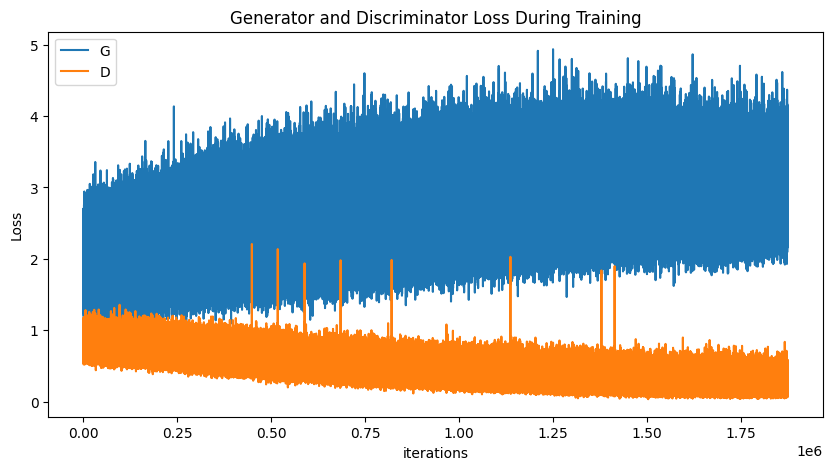

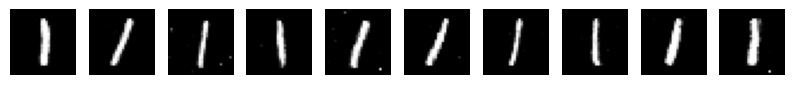

In [ ]:
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(losses_g, label="G")
plt.plot(losses_d, label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()e

def show_fake_images(generator, num_images=10):
    z = torch.randn(num_images, z_dim).cuda()
    fake_images = generator(z)
    fake_images = fake_images.view(fake_images.size(0), 28, 28).data.cpu().numpy()

    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(fake_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

show_fake_images(G)


# DCGANs

In [27]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable


In [28]:
batch_size = 100
learning_rate = 0.0002
z_dim = 100
z = torch.randn(batch_size, z_dim, 1, 1).cuda()


In [29]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, ), std=(0.5, ))
])

mnist = dsets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=mnist, batch_size=batch_size, shuffle=True)


In [30]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.ConvTranspose2d(z_dim, 256, 4, 1, 0, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 3, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 1, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)


In [31]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 3, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)


In [32]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)


In [33]:
G = Generator().cuda()
D = Discriminator().cuda()

G.apply(weights_init)
D.apply(weights_init)


Discriminator(
  (main): Sequential(
    (0): Conv2d(1, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (9): Sigmoid()
  )
)

In [36]:
criterion = nn.BCELoss()

d_optimizer = torch.optim.Adam(D.parameters(), lr=learning_rate)
g_optimizer = torch.optim.Adam(G.parameters(), lr=learning_rate)


In [ ]:
def show_fake_images(generator, num_images=10):
    z = torch.randn(batch_size, z_dim, 1, 1).cuda()  # Ajuste del tamaño del ruido
    fake_images = generator(z)
    fake_images = fake_images.view(fake_images.size(0), 28, 28).data.cpu().numpy()

    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(fake_images[i], cmap='gray')
        plt.axis('off')
    plt.show()

In [42]:
# Listas para almacenar pérdidas y visualizar después
losses_g = []
losses_d = []

num_epochs = 100
i = 0
# Bucle de entrenamiento
for epoch in range(num_epochs):
    for batch_idx, (real_images, _) in enumerate(train_loader):
        batch_size = real_images.size(0)
        real_images = real_images.cuda()

        # Etiquetas
        # real_labels = torch.ones(batch_size, 1).cuda()
        # fake_labels = torch.zeros(batch_size, 1).cuda()
        real_labels = torch.ones(batch_size, 1, 1, 1).cuda()
        fake_labels = torch.zeros(batch_size, 1, 1, 1).cuda()

        # ===== Entrenamiento del discriminador =====
        # Computar la pérdida con imágenes reales
        outputs = D(real_images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        # Computar la pérdida con imágenes falsas
        z = torch.randn(batch_size, z_dim, 1, 1).cuda()  # Ajuste del tamaño del ruido
        fake_images = G(z)
        outputs = D(fake_images.detach()) # .detach() para no entrenar G aquí
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

        # Backpropagation y optimización
        d_loss = d_loss_real + d_loss_fake
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # ===== Entrenamiento del generador =====
        z = torch.randn(batch_size, z_dim, 1, 1).cuda()
        fake_images = G(z)
        outputs = D(fake_images)

        g_loss = criterion(outputs, real_labels)  # Aquí usamos real_labels porque queremos que el generador engañe al discriminador

        # Backpropagation y optimización
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        # Almacenar las pérdidas
        losses_g.append(g_loss.item())
        losses_d.append(d_loss.item())

        i += 1
        if i == 10:
          show_fake_images(G)
          i = 0

    # Imprimir las estadísticas del entrenamiento
    print(f'Epoch [{epoch}/{num_epochs}], d_loss: {d_loss.item():.4f}, g_loss: {g_loss.item():.4f}, D(x): {real_score.mean().item():.2f}, D(G(z)): {fake_score.mean().item():.2f}')


Epoch [0/100], d_loss: 0.5233, g_loss: 2.6116, D(x): 0.80, D(G(z)): 0.21
Epoch [1/100], d_loss: 0.2510, g_loss: 3.8534, D(x): 0.89, D(G(z)): 0.11
Epoch [2/100], d_loss: 0.1739, g_loss: 3.5643, D(x): 0.88, D(G(z)): 0.03
Epoch [3/100], d_loss: 0.0562, g_loss: 6.9869, D(x): 0.97, D(G(z)): 0.02
Epoch [4/100], d_loss: 0.2217, g_loss: 5.3016, D(x): 0.88, D(G(z)): 0.08
Epoch [5/100], d_loss: 0.3051, g_loss: 2.3579, D(x): 0.96, D(G(z)): 0.20
Epoch [6/100], d_loss: 0.2160, g_loss: 2.6226, D(x): 0.87, D(G(z)): 0.06
Epoch [7/100], d_loss: 0.2657, g_loss: 1.0583, D(x): 0.95, D(G(z)): 0.18
Epoch [8/100], d_loss: 0.5313, g_loss: 0.5384, D(x): 0.99, D(G(z)): 0.34
Epoch [9/100], d_loss: 0.3485, g_loss: 5.5782, D(x): 0.75, D(G(z)): 0.02
Epoch [10/100], d_loss: 0.2717, g_loss: 2.0085, D(x): 0.94, D(G(z)): 0.17
Epoch [11/100], d_loss: 0.6070, g_loss: 3.3490, D(x): 0.61, D(G(z)): 0.02
Epoch [12/100], d_loss: 0.2789, g_loss: 1.5168, D(x): 0.81, D(G(z)): 0.04
Epoch [13/100], d_loss: 0.4131, g_loss: 1.5709, 

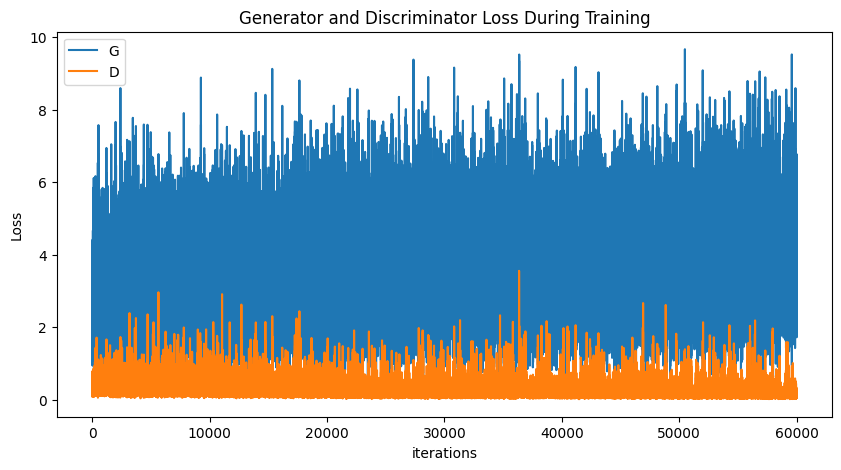

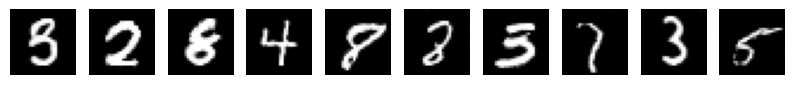

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(losses_g, label="G")
plt.plot(losses_d, label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()



show_fake_images(G)

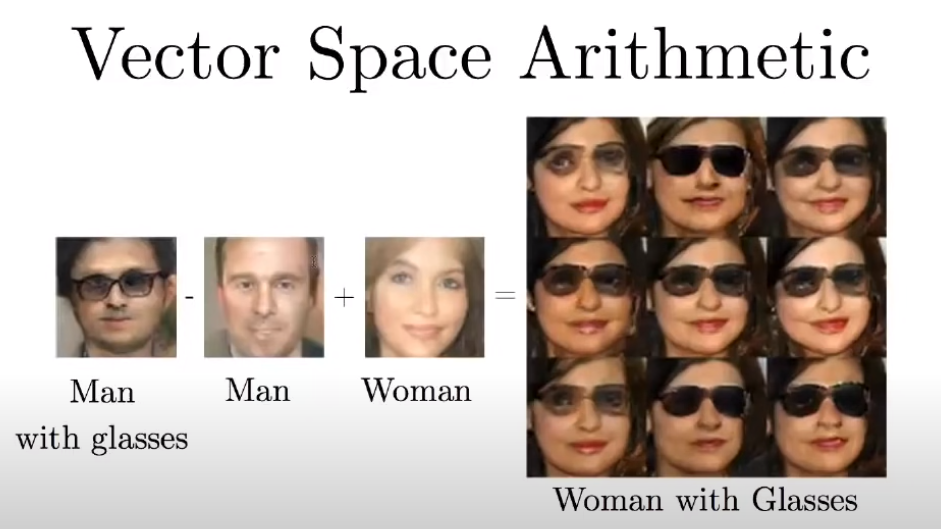

# Otros datasets

In [55]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

# Transformación común para la mayoría de los datasets (puede necesitar ajustes específicos)
fashion_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Sólo un canal, por lo tanto, una media y una desviación estándar
])

# CIFAR-10
# cifar10_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# cifar10_loader = DataLoader(cifar10_dataset, batch_size=128, shuffle=True)

# CIFAR-100
# cifar100_dataset = datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
# cifar100_loader = DataLoader(cifar100_dataset, batch_size=128, shuffle=True)

# CelebA (puede necesitar descargarlo manualmente o ajustar el código según la estructura de carpetas)
# celeba_dataset = datasets.ImageFolder(root='./data/celeba', transform=transform)
# celeba_loader = DataLoader(celeba_dataset, batch_size=128, shuffle=True)

# Fashion MNIST
fashion_mnist_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=fashion_transform)
fashion_mnist_loader = DataLoader(fashion_mnist_dataset, batch_size=128, shuffle=True)

# LSUN (debes especificar las categorías que deseas)
# lsun_dataset = datasets.LSUN(root='./data', classes=['bedroom_train'], transform=transform)
# lsun_loader = DataLoader(lsun_dataset, batch_size=128, shuffle=True)


100%|██████████| 1875/1875 [01:58<00:00, 15.89it/s]


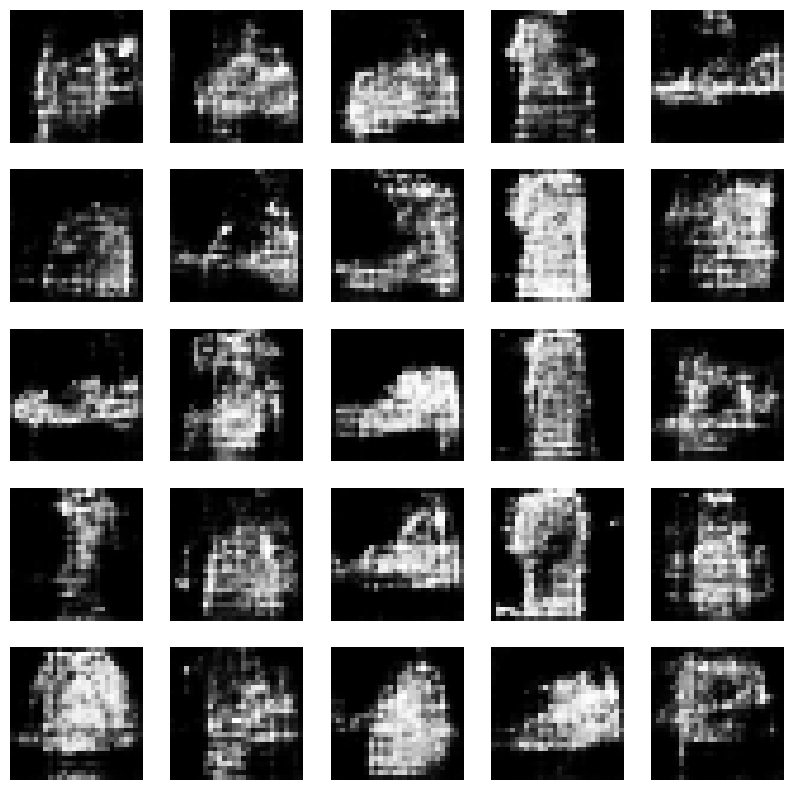

100%|██████████| 1875/1875 [01:57<00:00, 15.95it/s]


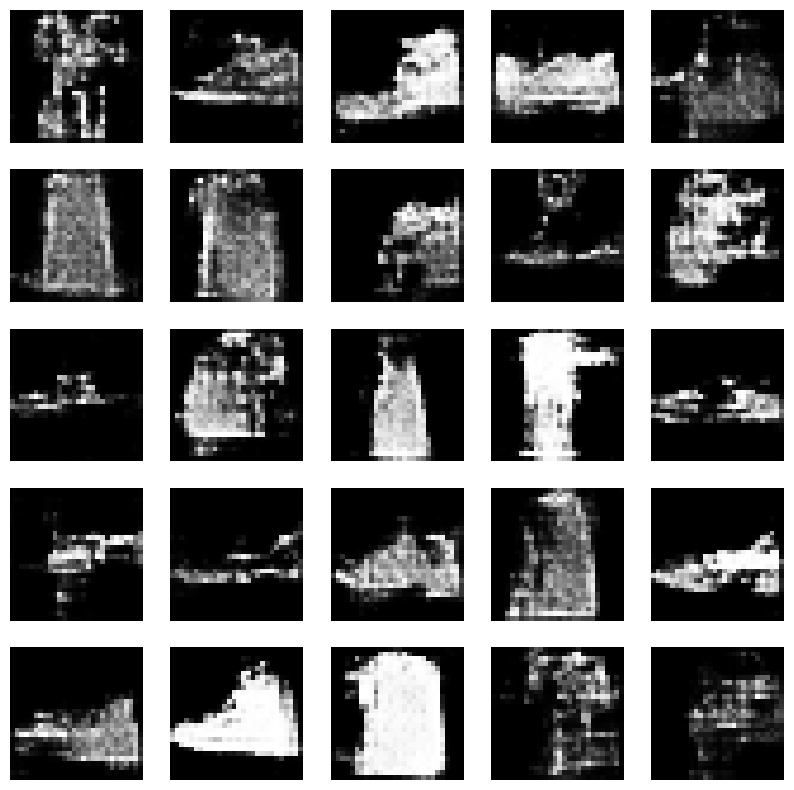

100%|██████████| 1875/1875 [01:57<00:00, 15.96it/s]


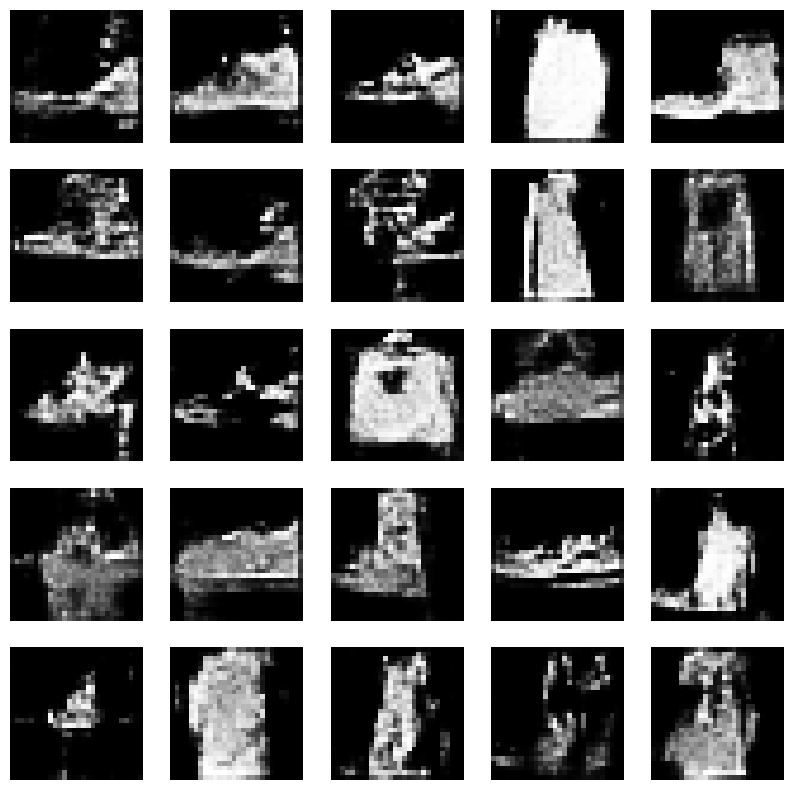

100%|██████████| 1875/1875 [01:59<00:00, 15.68it/s]


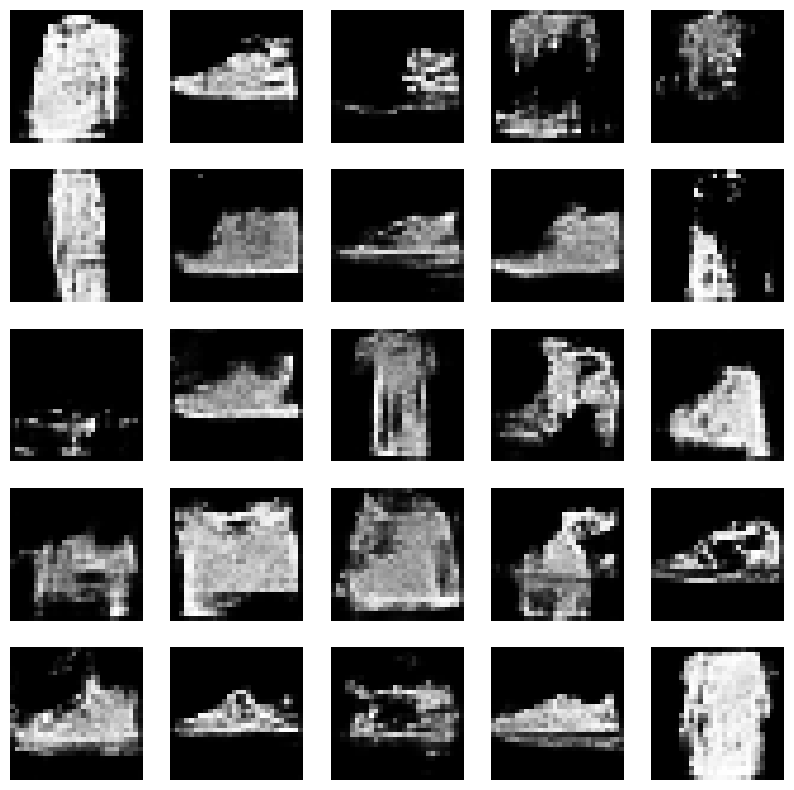

100%|██████████| 1875/1875 [02:00<00:00, 15.59it/s]


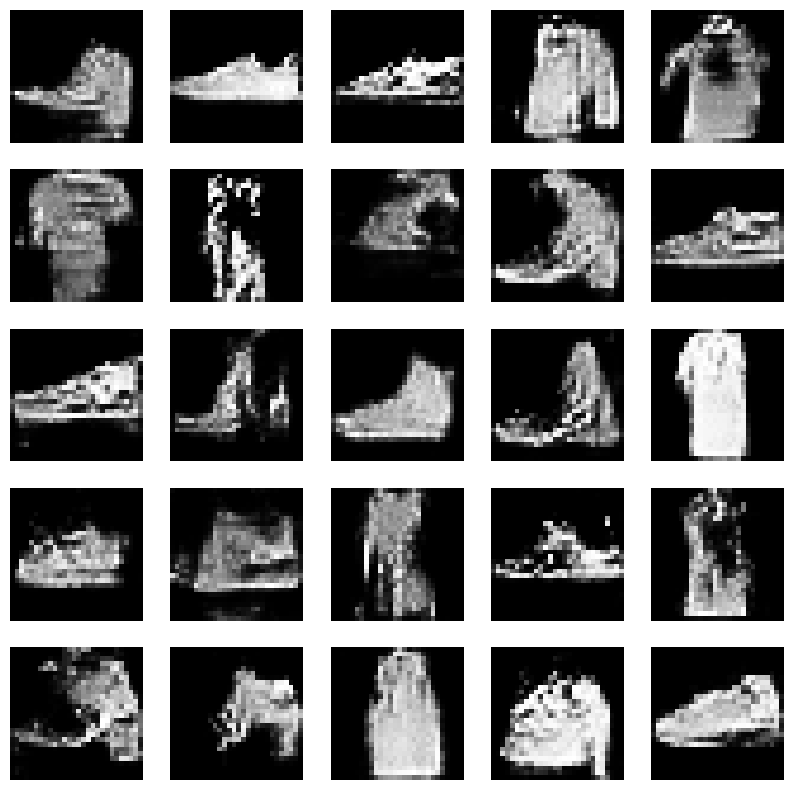

100%|██████████| 1875/1875 [01:59<00:00, 15.73it/s]


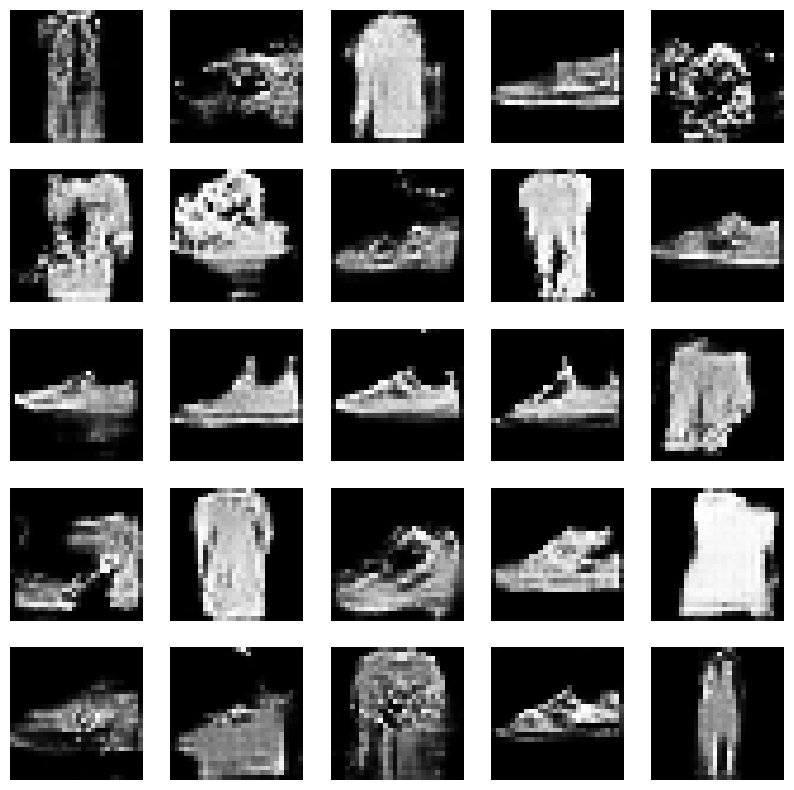

100%|██████████| 1875/1875 [01:59<00:00, 15.66it/s]


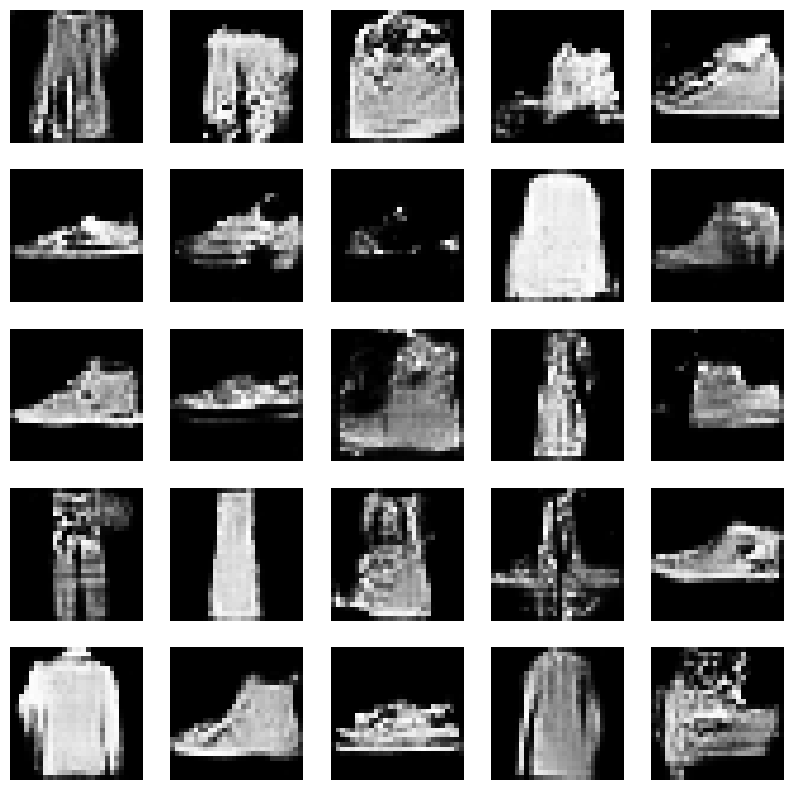

100%|██████████| 1875/1875 [02:05<00:00, 14.98it/s]


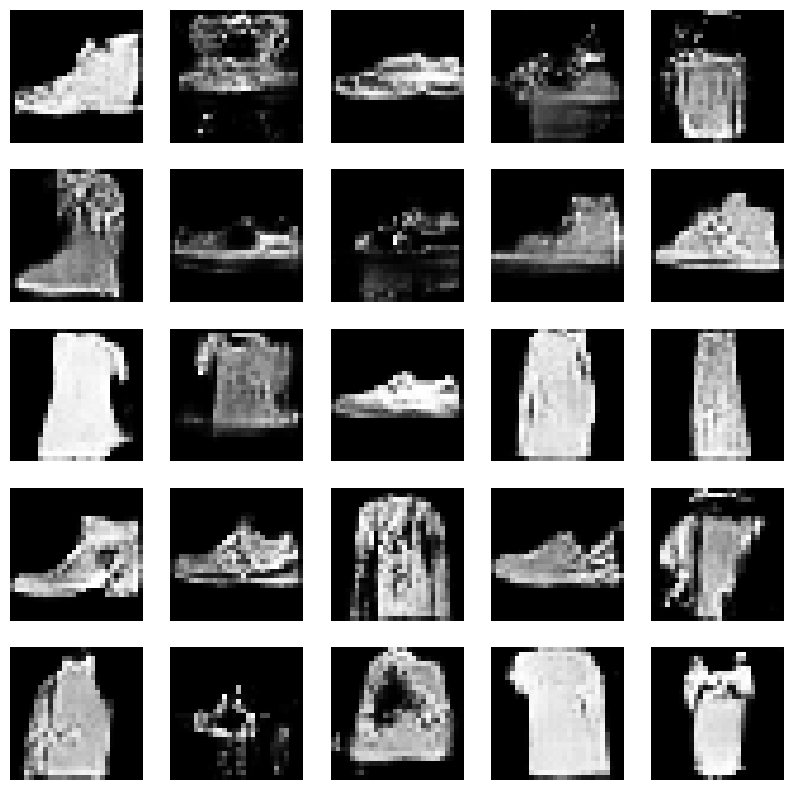

100%|██████████| 1875/1875 [01:58<00:00, 15.85it/s]


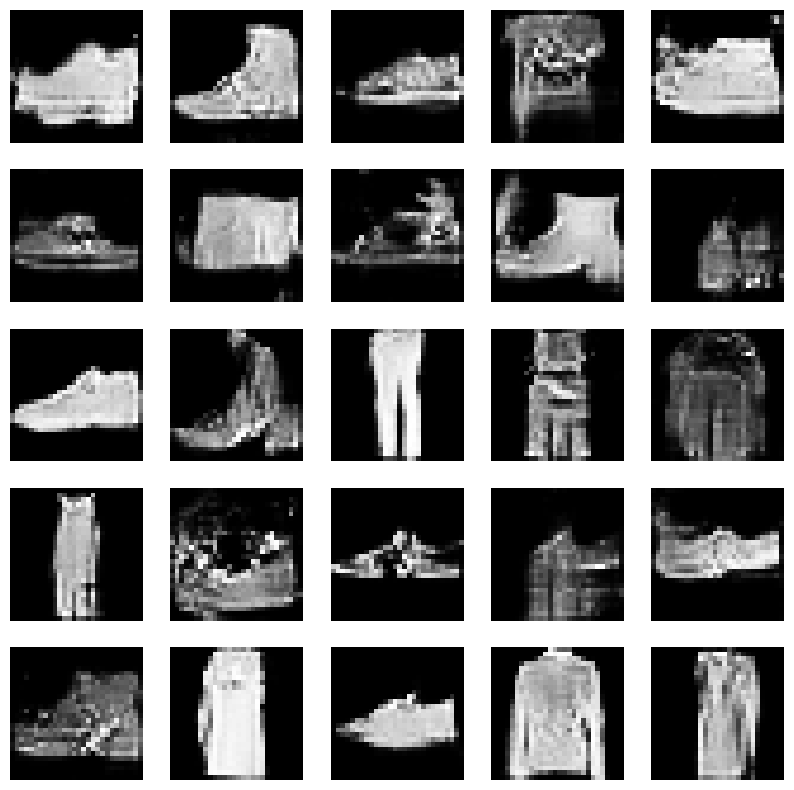

100%|██████████| 1875/1875 [02:02<00:00, 15.33it/s]


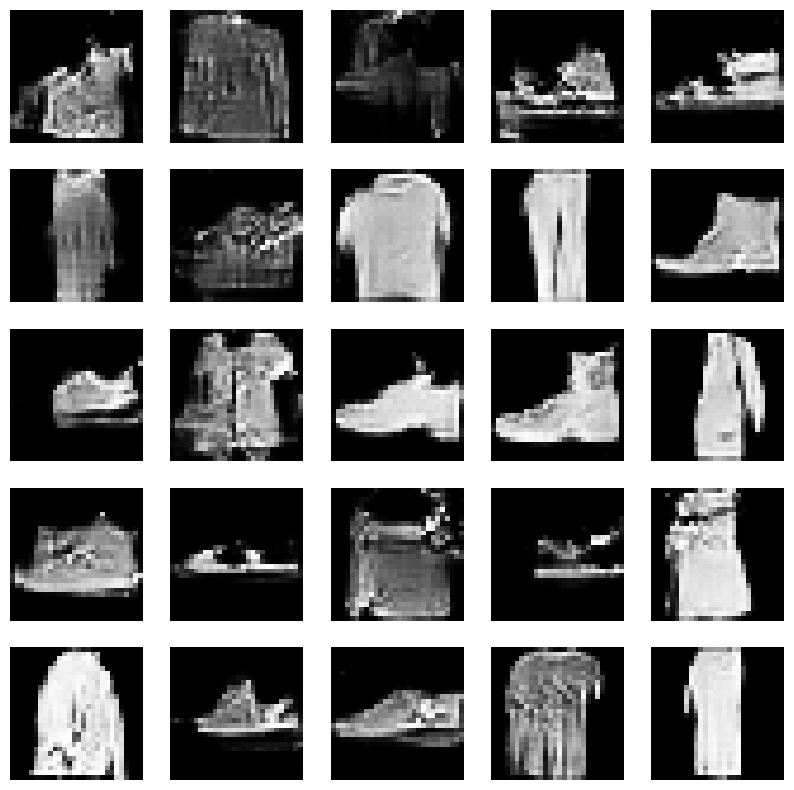

100%|██████████| 1875/1875 [01:57<00:00, 15.93it/s]


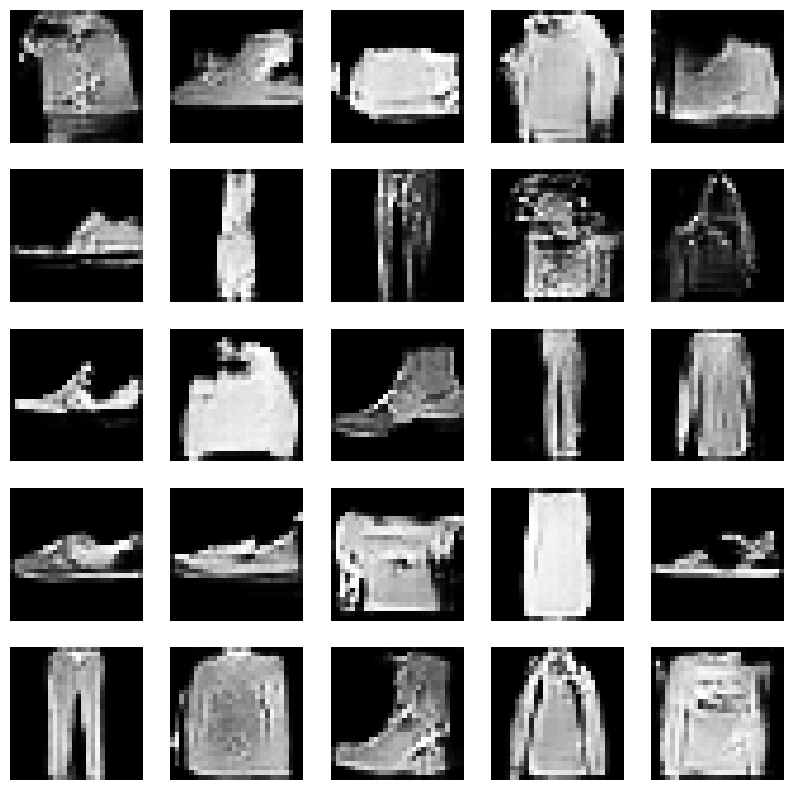

100%|██████████| 1875/1875 [01:58<00:00, 15.79it/s]


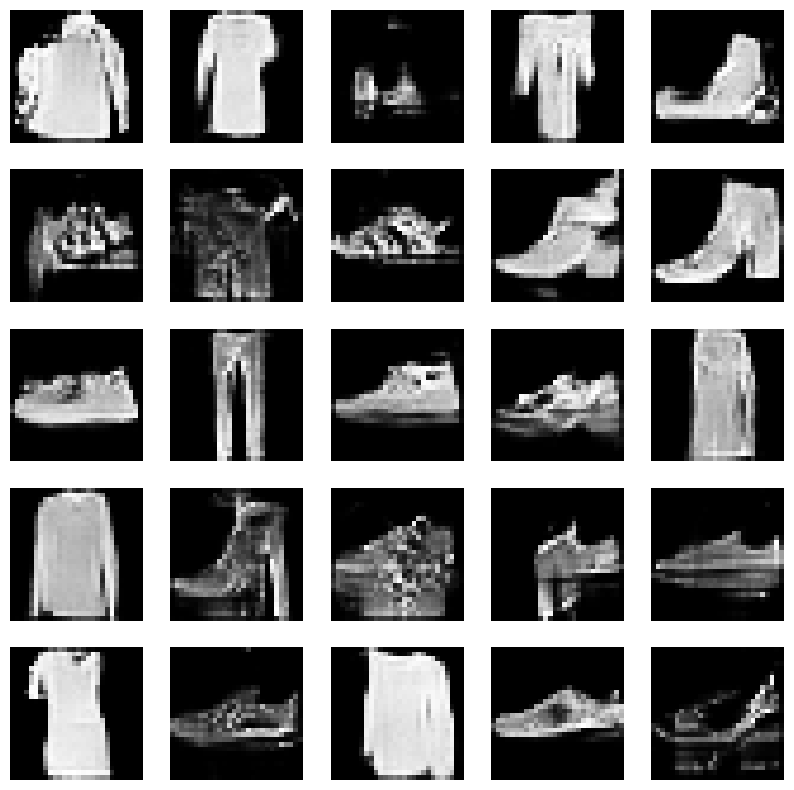

100%|██████████| 1875/1875 [01:58<00:00, 15.89it/s]


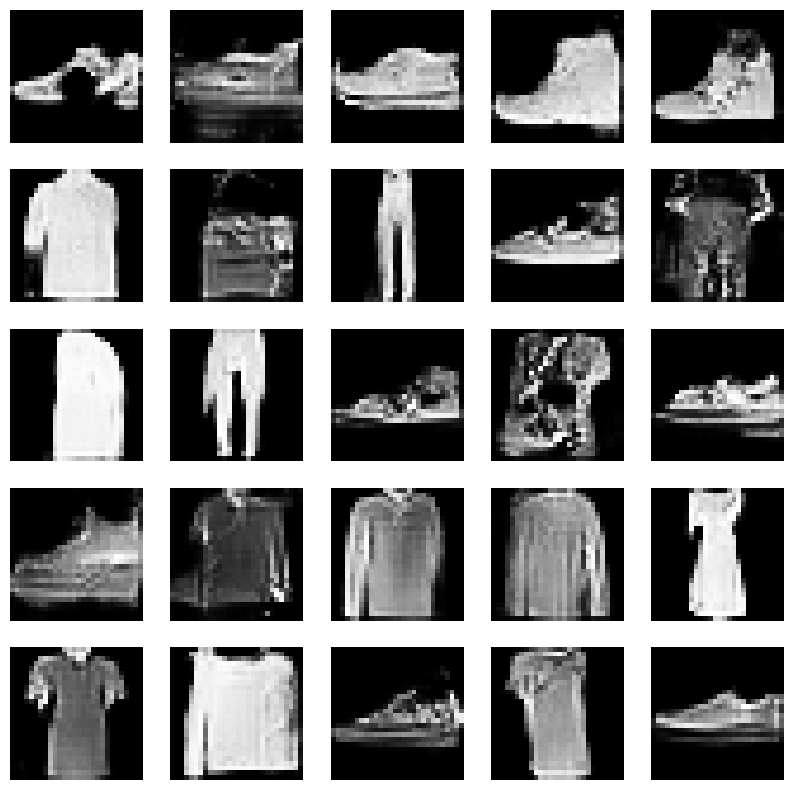

100%|██████████| 1875/1875 [01:59<00:00, 15.70it/s]


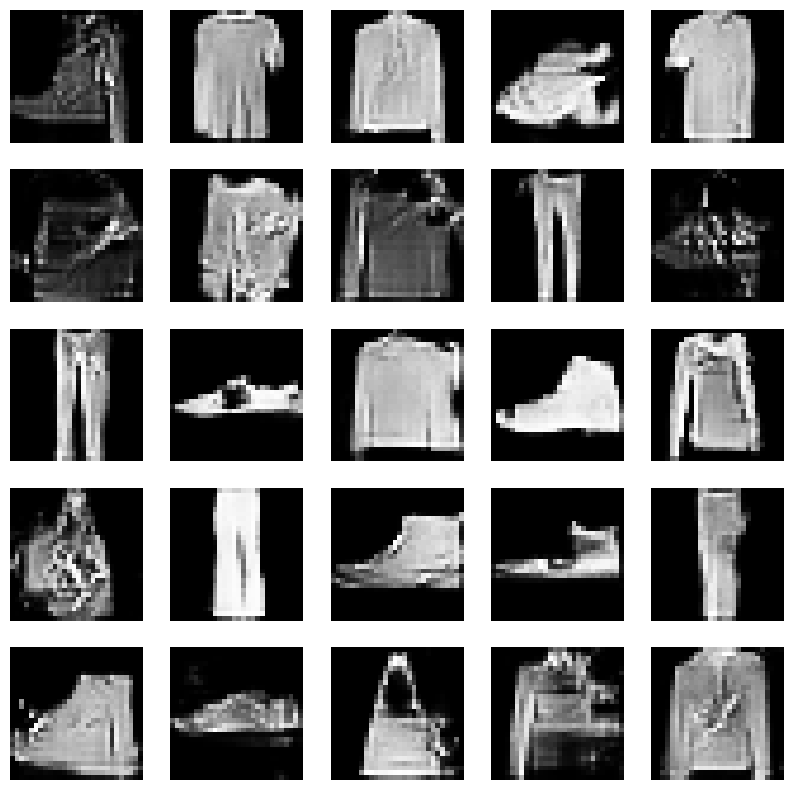

100%|██████████| 1875/1875 [01:59<00:00, 15.68it/s]


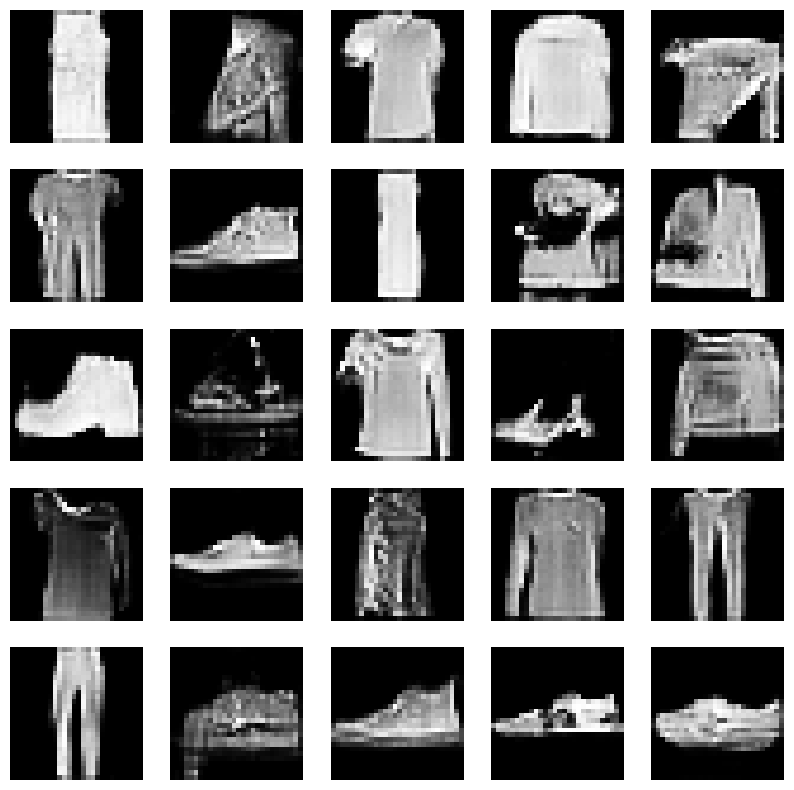

100%|██████████| 1875/1875 [01:58<00:00, 15.81it/s]


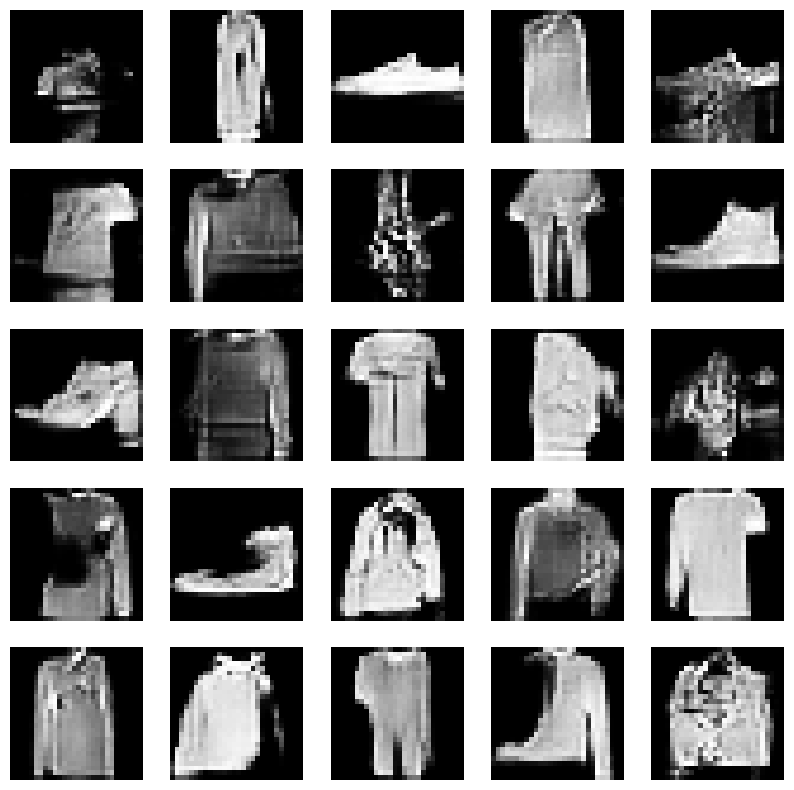

100%|██████████| 1875/1875 [02:00<00:00, 15.53it/s]


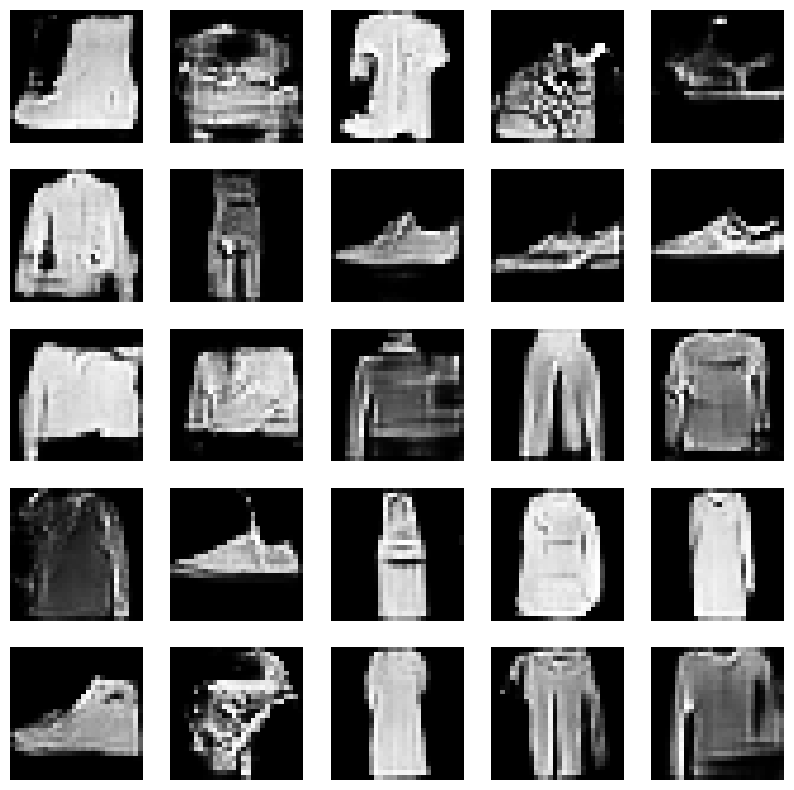

100%|██████████| 1875/1875 [01:58<00:00, 15.83it/s]


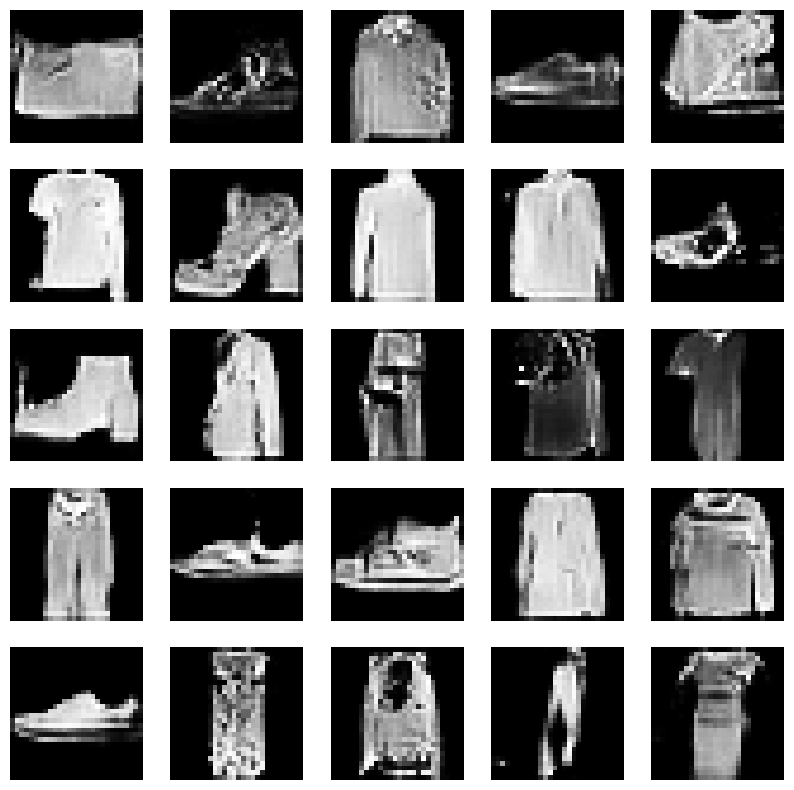

100%|██████████| 1875/1875 [02:00<00:00, 15.62it/s]


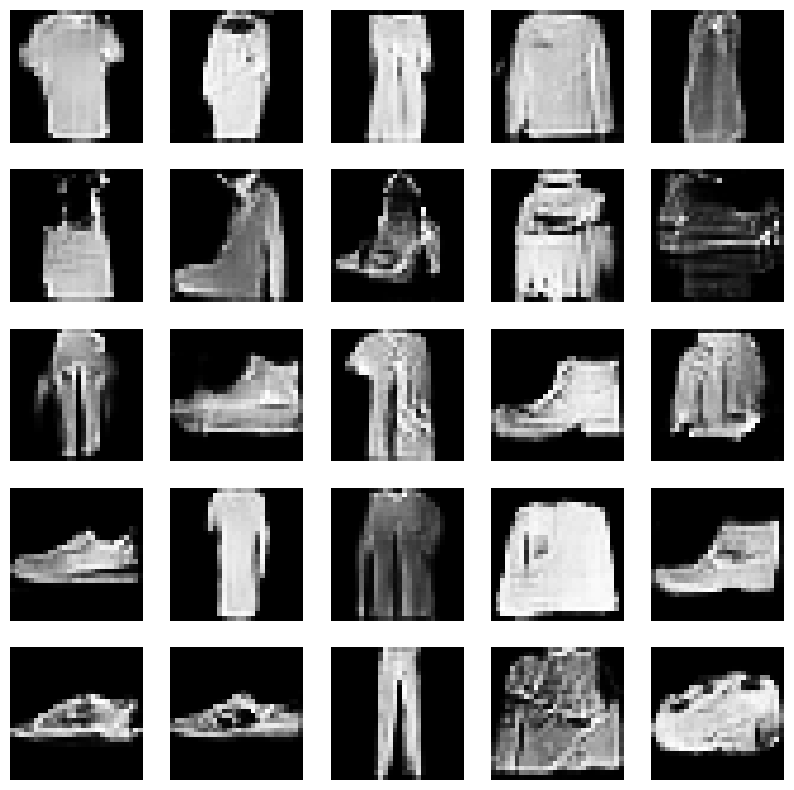

100%|██████████| 1875/1875 [01:58<00:00, 15.79it/s]


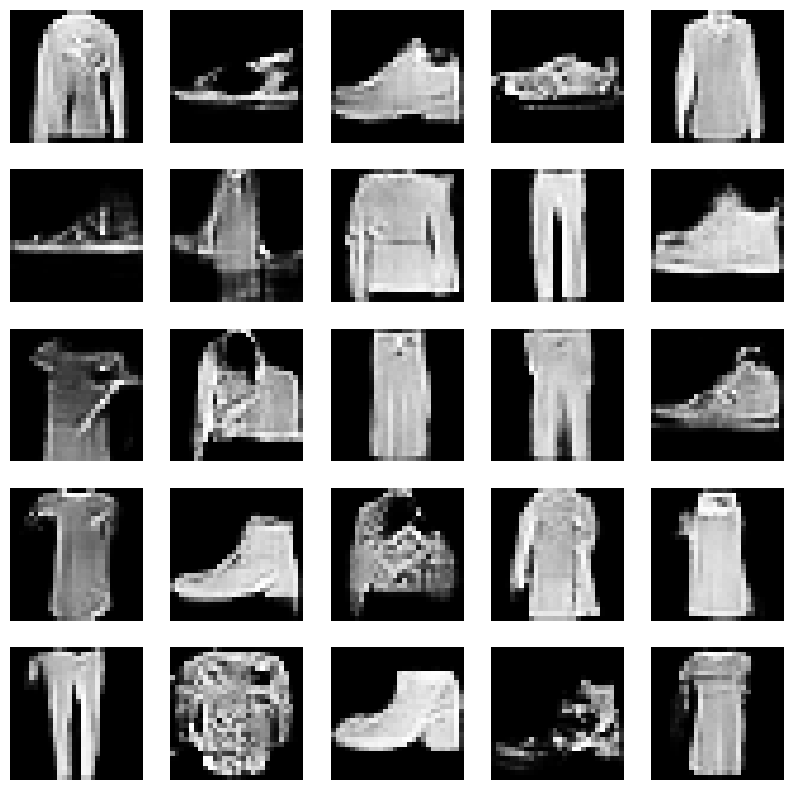

100%|██████████| 1875/1875 [01:59<00:00, 15.64it/s]


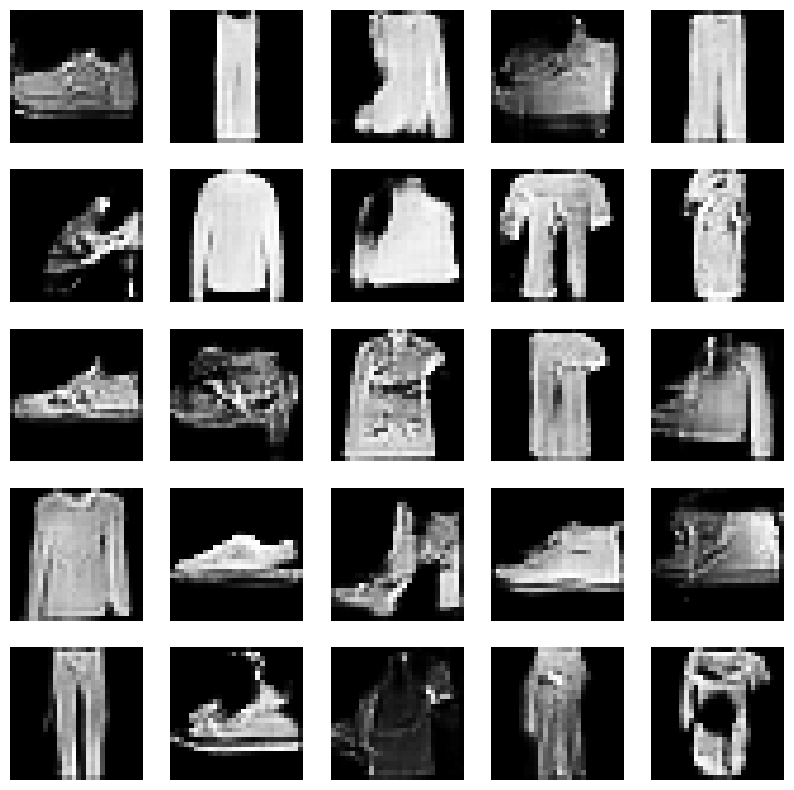

100%|██████████| 1875/1875 [01:57<00:00, 15.91it/s]


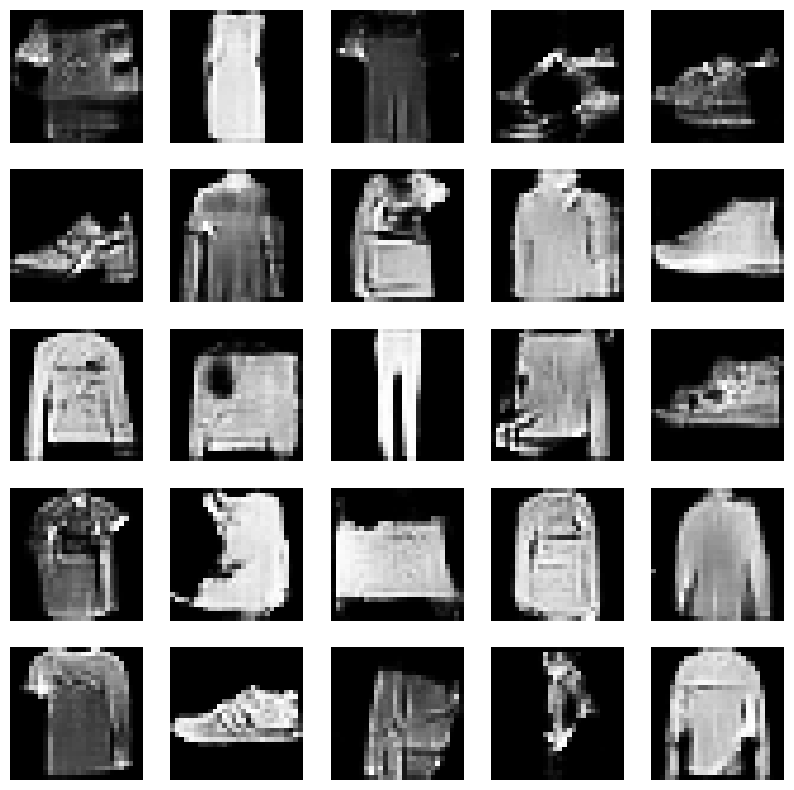

100%|██████████| 1875/1875 [01:59<00:00, 15.69it/s]


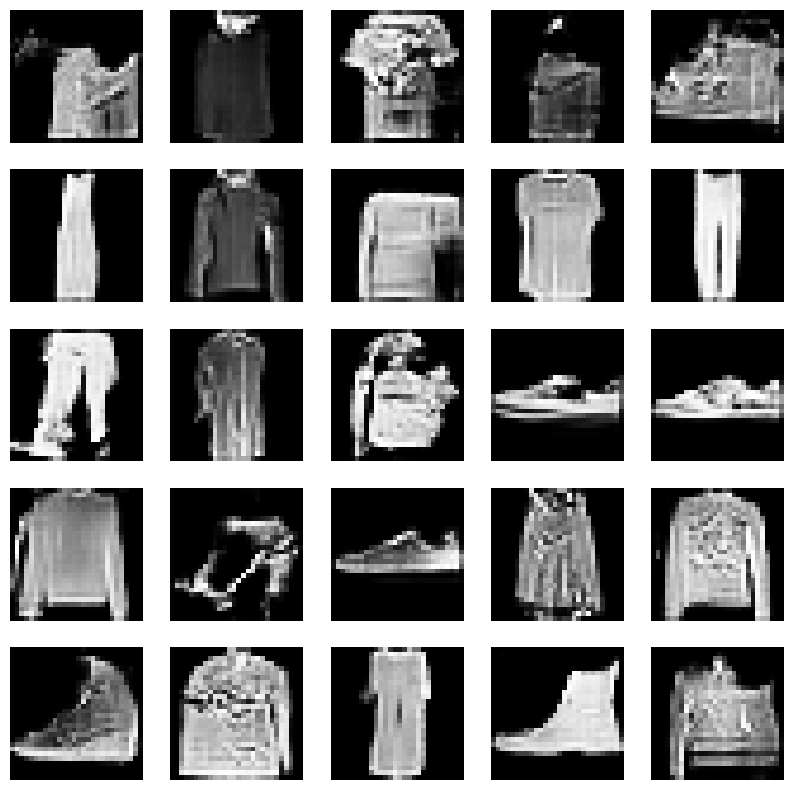

100%|██████████| 1875/1875 [02:00<00:00, 15.60it/s]


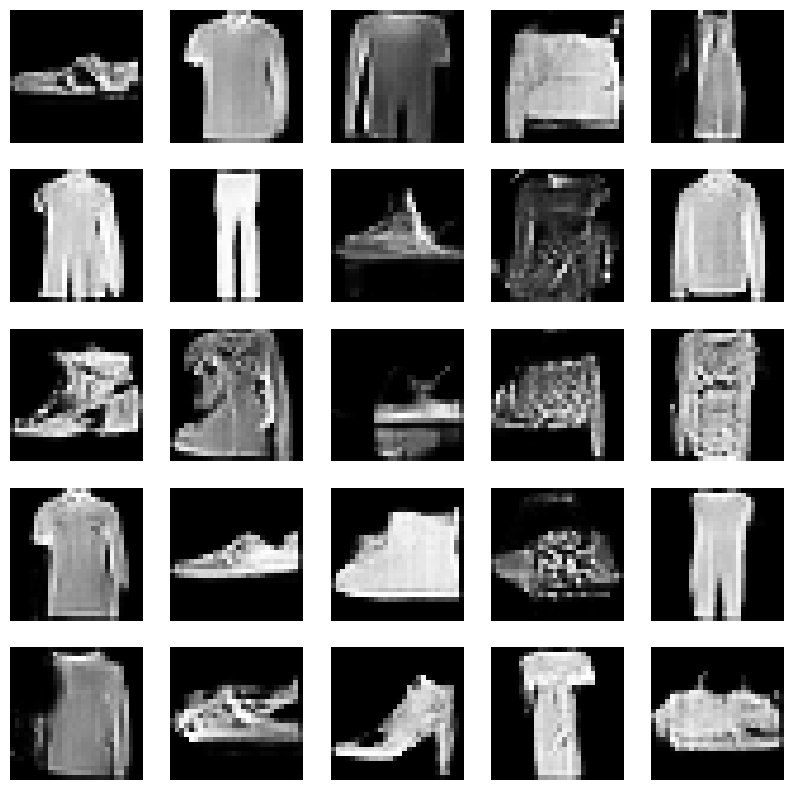

100%|██████████| 1875/1875 [01:59<00:00, 15.70it/s]


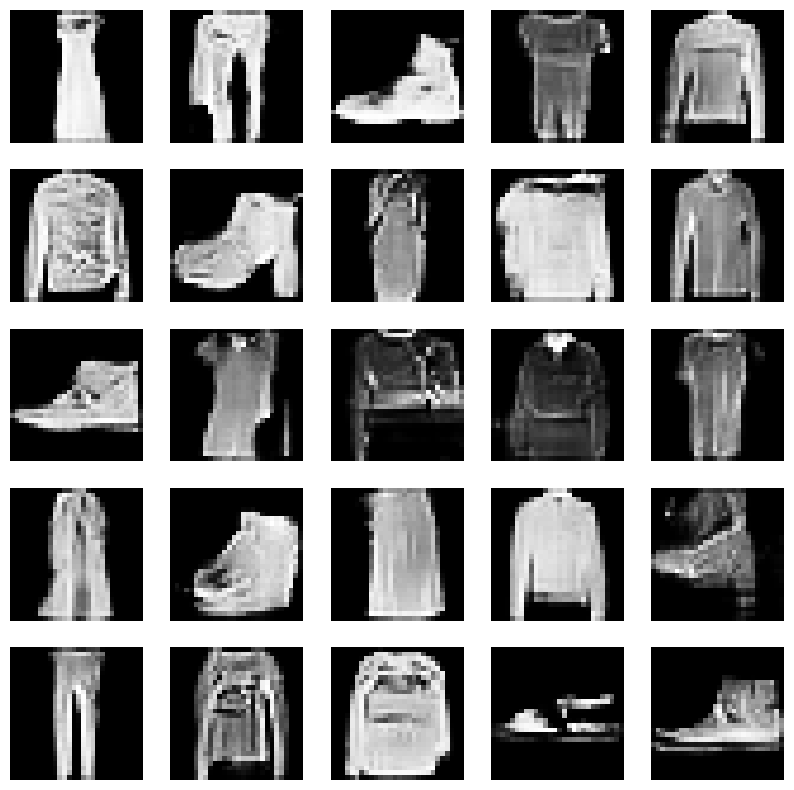

100%|██████████| 1875/1875 [02:01<00:00, 15.43it/s]


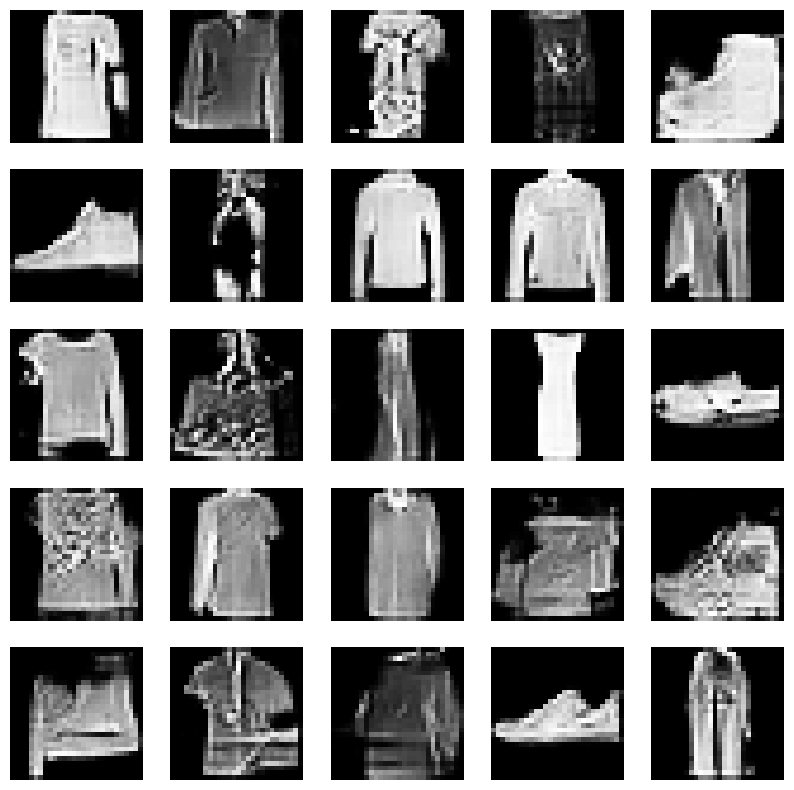

 84%|████████▍ | 1584/1875 [01:41<00:21, 13.51it/s]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torchvision.utils as vutils
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np


class Generator(nn.Module):
    def __init__(self, num_features):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(num_features, 7*7*128),
            nn.BatchNorm1d(7*7*128),
            nn.ReLU(True),
        )

        self.deconv = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(True),
            nn.ConvTranspose2d(64, 1, kernel_size=5, stride=2, padding=2, output_padding=1),
            nn.Tanh()
        )

    def forward(self, input):
        x = self.main(input)
        x = x.view(-1, 128, 7, 7)  # Reformo el tensor antes de pasarlo a las capas convolucionales
        return self.deconv(x)

# Definición del Discriminador
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Conv2d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Flatten(),
            nn.Linear(7*7*128, 1),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

# Transformación y carga del conjunto de datos
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_loader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('.', train=True, download=True, transform=transform),
    batch_size=32, shuffle=True)

# Instanciando el Generador y el Discriminador
generator = Generator(z_dim)
discriminator = Discriminator()

# Optimizadores
optimizer_g = optim.RMSprop(generator.parameters(), lr=0.0005)
optimizer_d = optim.RMSprop(discriminator.parameters(), lr=0.0005)

criterion = nn.BCELoss()
num_epochs = 100

# Bucle de entrenamiento
for epoch in range(num_epochs):
    for real_images, _ in tqdm(train_loader):
        optimizer_g.zero_grad()
        noise = torch.randn(real_images.size(0), 100)
        fake_images = generator(noise)
        labels = torch.ones(real_images.size(0), 1)
        output = discriminator(fake_images)
        loss_g = criterion(output, labels)
        loss_g.backward()
        optimizer_g.step()

        optimizer_d.zero_grad()
        real_labels = torch.ones(real_images.size(0), 1)
        fake_labels = torch.zeros(real_images.size(0), 1)
        output_real = discriminator(real_images)
        output_fake = discriminator(fake_images.detach())
        loss_real = criterion(output_real, real_labels)
        loss_fake = criterion(output_fake, fake_labels)
        loss_d = (loss_real + loss_fake) / 2
        loss_d.backward()
        optimizer_d.step()

    # Visualización de las imágenes generadas
    with torch.no_grad():
        fake_images = generator(torch.randn(25, 100))
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i+1)
            plt.imshow(fake_images[i].squeeze().numpy() * 0.5 + 0.5, cmap='gray')
            plt.axis('off')
        plt.show()

        # ===== Entrenamiento del discriminador =====
        # Computar la pérdida con imágenes reales
        outputs = D(real_images)
        d_loss_real = criterion(outputs, real_labels)
        real_score = outputs

        # Computar la pérdida con imágenes falsas
        z = torch.randn(batch_size, z_dim, 1, 1).cuda()  # Ajuste del tamaño del ruido
        fake_images = G(z)
        outputs = D(fake_images)
        d_loss_fake = criterion(outputs, fake_labels)
        fake_score = outputs

    print(f'Epoch [{epoch}/{num_epochs}], d_loss: {loss_d.item():.4f}, g_loss: {loss_g.item():.4f}, D(x): {real_score.mean().item():.2f}, D(G(z)): {fake_score.mean().item():.2f}')

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(losses_g, label="G")
plt.plot(losses_d, label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()



show_fake_images(G)